## Stocks & Covid

How the stock of some large corporations performed when the pandemic swept the world.
To accomplish this, I used the Yahoo finance data and Covid cases data made available by the New York Times.

In [1]:
%%capture
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

# Plotting libraries
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 6)
plt.style.use('seaborn-darkgrid')

Next, I downloaded the stock market data for 4 big companies. I looked at some companies that I expected to have performed well due to lockdown times, and some companies that I expected have suffered from the travel restrictions imposed almost worldwide.

In [3]:
%%capture
tickers = ["MSFT", "NFLX", "BKNG", "AAL"]
data = yf.download(" ".join(tickers), start="2020-01-01", end="2021-09-26")

Before plotting the closing prices over time, let's normalize the stock prices so they all fall between 0 and 1. This will help us better interpret the trends.

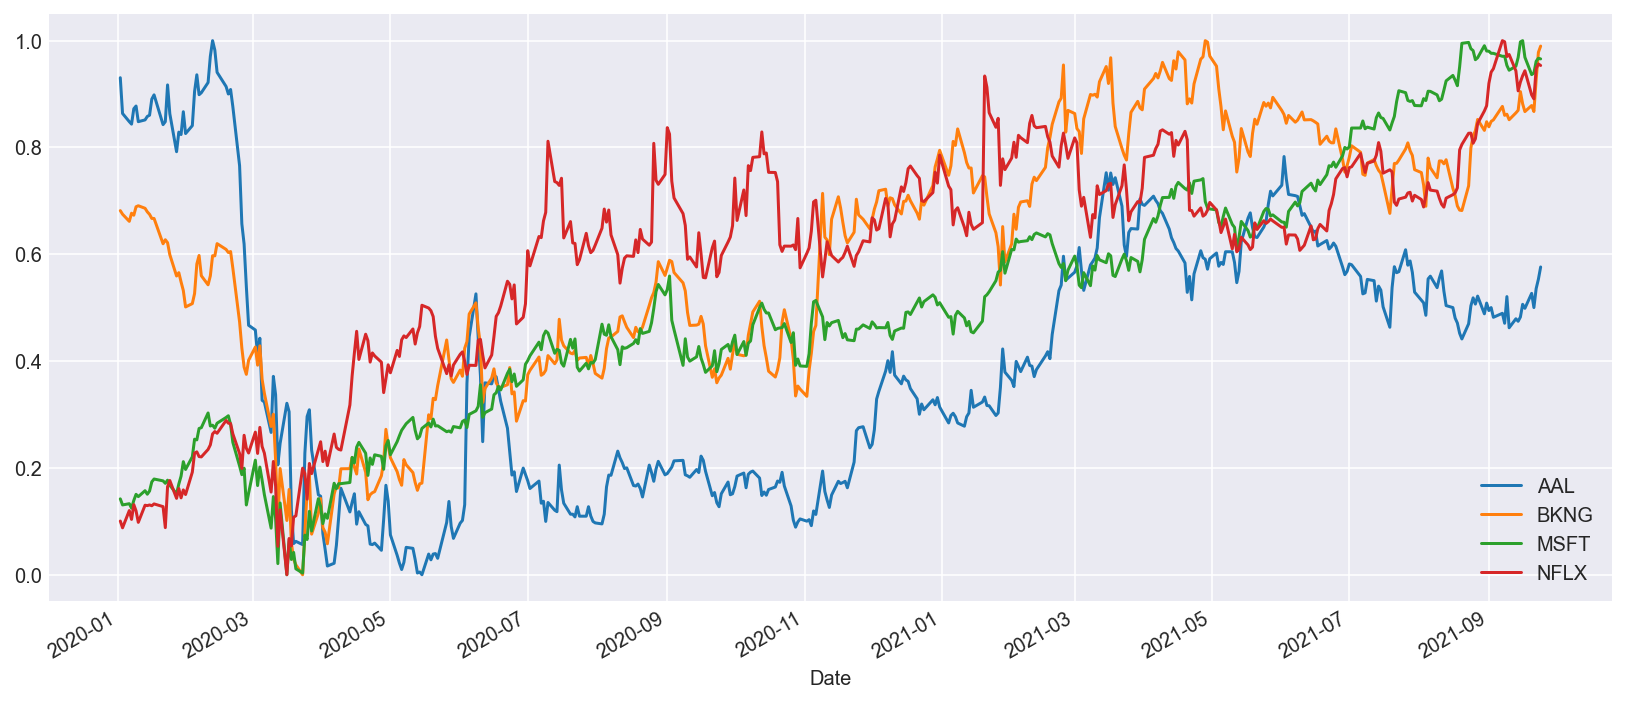

In [8]:
closes = data['Adj Close']
for i in tickers:
    closes[i] = (closes[i] - closes[i].min()) / (closes[i].max() - closes[i].min())
closes.plot()
plt.show()

 We clearly see a sharp drop around March 2020, across all stocks. Let's overlay this data with the number of covid cases to see if there is a connection.

In [23]:
import pandas as pd
import numpy as np
covid = pd.read_csv("covid_cases.csv", index_col = 'date', usecols = ['date', 'cases'])
covid.index = pd.to_datetime(covid.index)
covid.head()

,cases
date,
2020-01-21,1
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,3


The Covid data by the New York times shows cumulative counts, but we're interested to see the cases on a daily basis, using a rolling 7-day average:

In [24]:
# uncumsum the cases
cumsum = covid['cases'].to_numpy()
cumsum_shifted = np.insert(np.delete(cumsum, -1), 0, 0)
uncumsum = cumsum - cumsum_shifted
covid['cases'] = uncumsum
covid['cases_rolling'] = covid.rolling(window=7).mean()
covid.head(n = 10)

,cases,cases_rolling
date,,
2020-01-21,1,NaN
2020-01-22,0,NaN
2020-01-23,0,NaN
2020-01-24,1,NaN
2020-01-25,1,NaN
2020-01-26,2,NaN
2020-01-27,0,0.714286
2020-01-28,0,0.571429
2020-01-29,0,0.571429


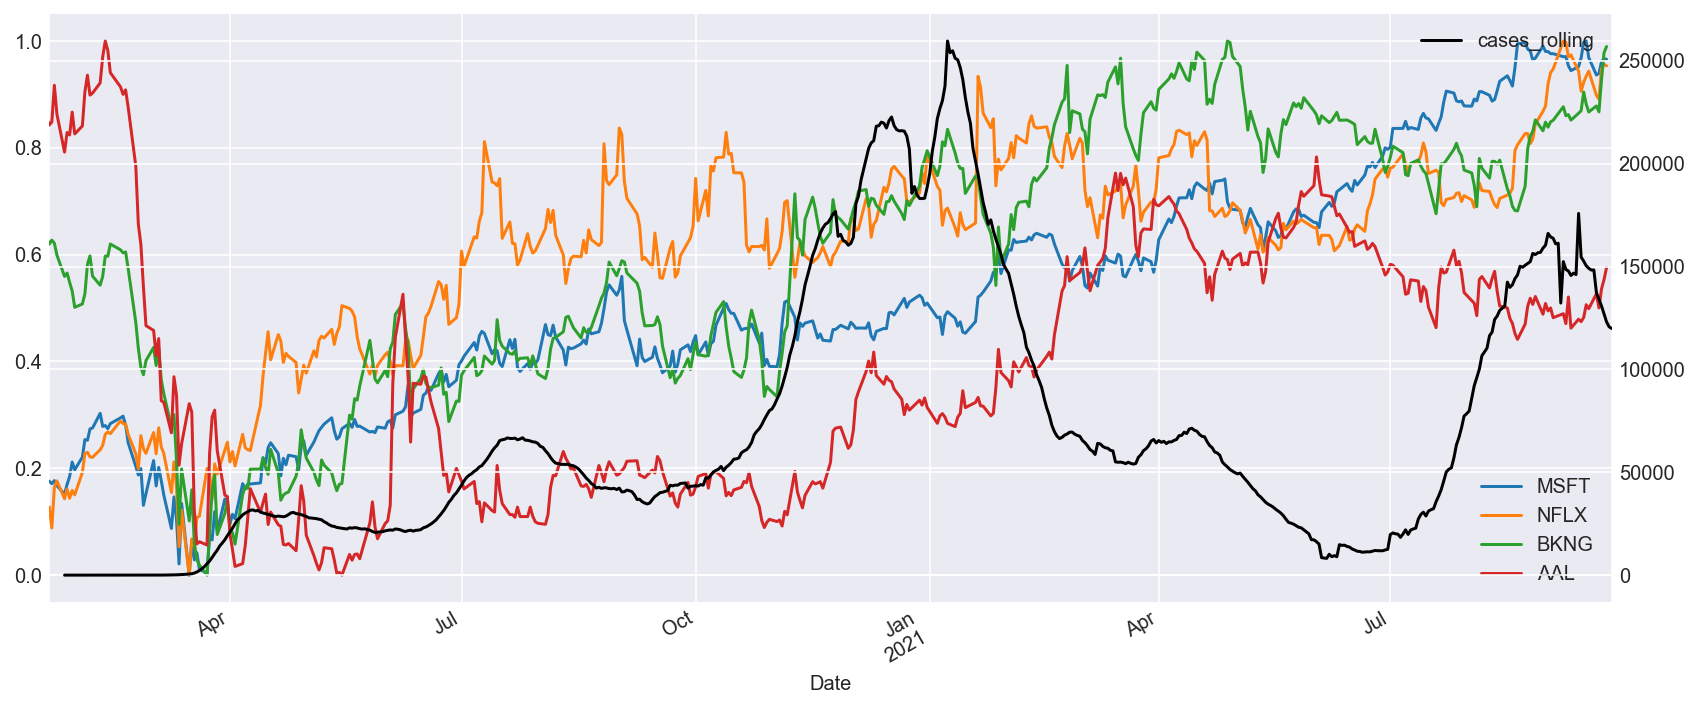

In [25]:
ax = closes.plot(y = tickers)
ax1 = ax.twinx()
covid.plot(y = 'cases_rolling', c = 'black', ax = ax1)
plt.show()

Interestingly, the sharp decline in value already happened way before the number of cases in the United States started to skyrocket.
By the time the pandemic was sweeping across the country in full force, some stocks, like MSFT had already rebounded to levels seen before Covid.
By the time the second wave was behind us, Both Msft, Netflix and Even booking were again at the same or higher levels than before Covid.
Only American Airlines is still struggling to recover and is at a lower level than it was before.